## Hipótese: o atraso nas entregas afetam se as pessoas voltam ou não

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

### Carregamento dos dados

In [2]:
all_orders = pd.read_csv("../datasets/trusted/all_orders.csv")
all_orders.count()

Unnamed: 0                       99441
order_id                         99441
customer_unique_id               99441
customer_city                    99441
customer_state                   99441
order_approved_at                99281
order_purchase_timestamp         99441
order_estimated_delivery_date    99441
order_delivered_carrier_date     97658
order_delivered_customer_date    96476
dtype: int64

In [3]:
more_than_once = pd.read_csv("../datasets/trusted/more_than_once.csv")
more_than_once.count()

Unnamed: 0                       2997
Unnamed: 0.1                     2997
order_id                         2997
customer_unique_id               2997
customer_city                    2997
customer_state                   2997
order_approved_at                2992
order_purchase_timestamp         2997
order_estimated_delivery_date    2997
order_delivered_carrier_date     2953
order_delivered_customer_date    2917
dtype: int64

### Análise dos atrasos

In [4]:
def delivery_delay(order):
    estimated = pd.to_datetime(order['order_estimated_delivery_date'])
    delivered = pd.to_datetime(order['order_delivered_customer_date'])
    return delivered - estimated

In [5]:
delays_in_days_mto = delivery_delay(more_than_once) / np.timedelta64(24, 'h')
delays_in_days_all = delivery_delay(all_orders) / np.timedelta64(24, 'h')

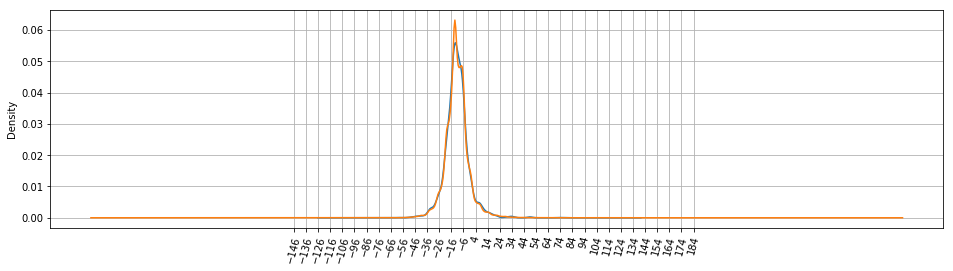

In [6]:
delays_in_days_mto.plot.kde(
    figsize=(16, 4),
    xticks=range(int(delays_in_days_mto.min()),
                 int(delays_in_days_mto.max()),
                 10),
    rot=75,
    grid=True)

delays_in_days_all.plot.kde(
    figsize=(16, 4),
    xticks=range(int(delays_in_days_all.min()),
                 int(delays_in_days_all.max()),
                 10),
    rot=75,
    grid=True)

In [7]:
ddmto = delays_in_days_mto.dropna().map(lambda x: math.trunc(x)).value_counts(normalize=True).sort_index()
ddmto.describe()

count    82.000000
mean      0.012195
std       0.018102
min       0.000343
25%       0.000686
50%       0.003085
75%       0.015598
max       0.071992
dtype: float64

In [8]:
ddall = delays_in_days_all.dropna().map(lambda x:math.trunc(x)).value_counts(normalize=True)[ddmto.index].sort_index()
ddall.describe()

count    82.000000
mean      0.012111
std       0.017925
min       0.000021
25%       0.000697
50%       0.002679
75%       0.017473
max       0.073863
dtype: float64

In [9]:
stats.kruskal(ddmto.values, ddall.values).pvalue

0.6759162116277826

A maioria das entregas para clientes que voltam acontecem dentro do prazo estipulado, e em sua maior parte adiantadas, com o pico no KDE no valor de -12 dias de "atraso", ou seja, 12 dias adiantado.

Para o total das entregas, no entanto, observa-se o mesmo padrão. Simultaneamente, o teste de Kruskal-Wallis apresenta um elevado p-value de aproximadamente 68%, o que indica que há uma boa chance de que as datas previstas e as datas de entrega apresentem a mesma distribuição tanto para a primeira compra quanto para os retornos. É possível que as entregas adiantadas não sejam a causa da volta dos clientes para mais compras.